# グラフ描画パッケージ Matplotlib

In [21]:
import matplotlib.pyplot as plt
import numpy as np

## 2次元プロット(折れ線グラフ)
(x,y(x))や、(x(t),y(t))（媒介変数表示）などのグラフを描画する。

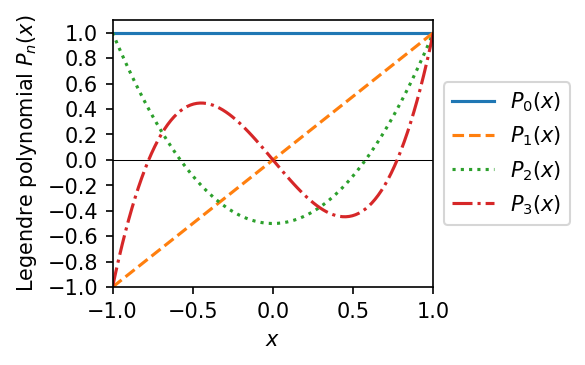

In [22]:
x = np.linspace(-1,1,100)
p0 = np.ones_like(x)
p1 = x.copy()
p2 = (3*x**2-1)/2
p3 = (5*x**3-3*x)/2

fig = plt.figure(figsize=(4,2.5),dpi=150)
ax = fig.add_subplot()
ax.axhline(0,lw=0.5,c="black")
ax.plot(x,p0,"-",label=r"$P_0(x)$")
ax.plot(x,p1,"--",label=r"$P_1(x)$")
ax.plot(x,p2,":",label=r"$P_2(x)$")
ax.plot(x,p3,"-.",label=r"$P_3(x)$")
ax.legend(bbox_to_anchor=(1,0.5),loc="center left")
ax.set_xlim(-1,1)
ax.set_ylim(-1,None)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"Legendre polynomial $P_n(x)$")
ax.set_xticks(np.linspace(-1,1,5))
ax.set_yticks(np.linspace(-1,1,11))
fig.tight_layout()
plt.show()

## 2次元カラーマップ
(x,y,f(x,y))のような、2次元依存性を持つ関数f(x,y)の値を表示する。

例として、$f(x,y)=\frac{1}{1+x^2+y^2}$のx,y平面上でのカラーマップを描画してみる。

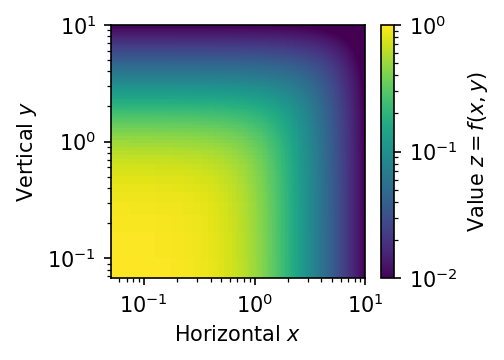

In [23]:
import matplotlib.colors as colors
x = np.linspace(0,10,200)
y = np.linspace(0,10,150)
x2, y2 = np.meshgrid(x,y)
z2=1/(1+x2**2+y2**2)

fig = plt.figure(figsize=(3.4,2.5),dpi=150)
ax = fig.add_subplot()
# mesh = ax.pcolormesh(x2,y2,z2)
mesh = ax.pcolormesh(x2,y2,z2,norm=colors.LogNorm(vmin=0.01, vmax=1))
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(x[1],x[-1])
ax.set_ylim(y[1],y[-1])
ax.set_xlabel(r"Horizontal $x$")
ax.set_ylabel(r"Vertical $y$")
fig.colorbar(mesh,label=r"Value $z=f(x,y)$")
fig.tight_layout()
plt.show()

## アニメーション

### 1. 連番画像として保存する方法：こちらの方が汎用的
以下の例ではpng/というディレクトリに animation_t00000000.png のような連番名の画像として保存する。  
(実行するにはpng/というディレクトリを事前に作成しておく必要がある)

連番画像を動画にする方法はいろいろあり、有償ソフトウェアなどは必ずしも必要ない。

In [26]:
x = np.linspace(0,4*np.pi,100)
y = np.sin(x)*np.exp(-0.3*x)

fig = plt.figure()
ax = fig.add_subplot()
for i in range(len(x)):
    ax.clear()
    ax.plot(x[:i+1],y[:i+1])
    ax.scatter(x[i],y[i],c="Grey")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1,1)
    filename="./png/animation_t{:08d}.png".format(i)
    fig.savefig(filename)
fig.clear()
plt.close(fig)

### 2. FuncAnimationを用いる方法：Jupyter上で表示でき手軽だが、あまり大きな動画は作成できない。

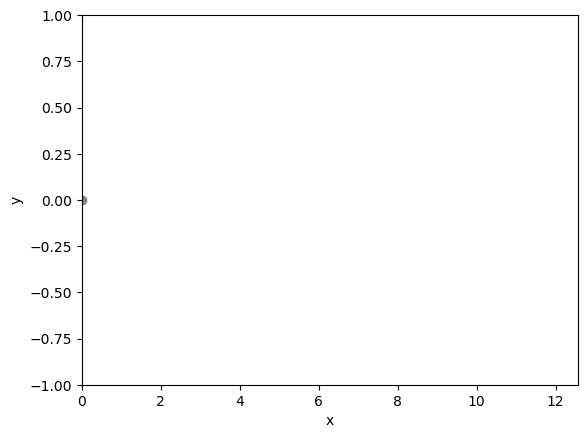

In [34]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

x = np.linspace(0,4*np.pi,100)
y = np.sin(x)*np.exp(-0.3*x)

fig = plt.figure()
ax = fig.add_subplot()
def update_ax(i):
    ax.clear()
    ax.plot(x[:i+1],y[:i+1])
    ax.scatter(x[i],y[i],c="Grey")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1,1)
ani = FuncAnimation(fig, update_ax, frames=range(0,len(x),1), interval=50)
HTML(ani.to_jshtml())